<div style="float:right;padding-top:20px">
   <img src="https://www.enib.fr/images/logo-enib-accueil.jpg" style="width:120px"/>
</div>

<h1><center>Le passe bas</center></h1>

Contributeurs:

- Théophile ROOS
- Mathéo MOIZAN
- Lukas BONATRE


In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from SecondOrderElec import LP, plot

%matplotlib inline

---
# Introduction

Les filtres passe-bas sont très utilisés en traitement du signal. 
Ils sont souvent utilisé dans les applications suivantes :
- Extraction de valeur moyennes
- filtrage de bruit 
- étage de lissage pour CAN

# Quelques circuits passe-bas

## Fonctionnement du notebook


Vous allez découvrir de magnifiques silders. Ceux-ci vont vous permettre de faire varier tous les paramêtres d'un filtre passe-bas du second ordre. Vous pourrez observer les phénomènes divers et variés qu'induisent les variations de ces paramètres.

Ainsi, vous pourrez faire varier:

- $m$
- $w0$
- $T0$ 

$$
\bar T = \frac{T_0}{1+\frac{2mp}{w_0} +\frac{p^2}{{w_0}^2}}
$$
---

![](./static/img/Rauch_LP.svg)

***Cellule de Rauch***

![](./static/img/RC_RC_LP.svg)

***RC_RC***

![](./static/img/RLC_LP.svg)

***RLC***

![](./static/img/SK_LP.svg)

***Sallen & Key***

# Etude

## Bodes

Jouez avec $w0$, $T0$ et $m$ pour voir les courbes évoluer. Pour voir les effets induits par les variations de $T0$, regardez l'axe des ordonnées, pour $w0$, l'axe des abscisses et pour m vous verrez les courbes (et les textes) ci-dessous changer en fonction des valeurs de $m$.

In [8]:
m = widgets.FloatSlider(value=1, min=-1.1, max=2.1, step=0.2, description='m: ', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.1f')

w0 = widgets.FloatSlider(value=10, min=0.1, max=100, step=1, description='w0: ', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.1f')

T0 = widgets.FloatSlider(value=1, min=0.2, max=2, step=0.1, description='T0: ', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.1f')

def draw_bode(w0, T0, m):
    
    if -1/np.sqrt(2) < m < 1/np.sqrt(2):    
        print("[m] On peut voir ici que Tmax est supérieur à T0. Le point le plus haut de la courbe est donc (wr, T0/2m).")
    else:
        print("[m] On peut voir ici que T0 est le Tmax.")
        
    print("    Plus m est petit, plus le basculement de la phase est rapide.")

    print()
    print("[T0] T0 est Ti, essayez de l'augmenter pour voir.")
    print()
    print("[w0] En changeant w0 on peut voir une translation sur l'axe X.")

    T = LP(w0=w0, T0=T0, m=m)
    print(f"[wr] : {T.wr/(2*np.pi)} rad/s")
    T.freqresp()


interactive_plot = interactive(draw_bode, w0=w0, T0=T0, m=m)
output = interactive_plot.children[-1]
output.layout.height = '850px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='w0: ', min=0.1, readout_format='.1f', step=1.0), Fl…

## Réponse impulsionelle

> La réponse impulsionelle ne comporte que la solution libre. Nous allons étudier la réponse indicielle ci dessous qui la contient plus un régime permanent ($v0T0$).

## Réponse indicielle

La réponse indicielle permet de retrouver rapidement les paramètres d'un filtre. On peut notamment y lire $Im(p1)$ si $0 <m< \frac{1}{2}$.

In [9]:
m = widgets.FloatSlider(value=1, min=-1.1, max=2.1, step=0.1, description='m: ', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.1f')

w0 = widgets.FloatSlider(value=10, min=0.1, max=100, step=1, description='w0: ', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.1f')

T0 = widgets.FloatSlider(value=1, min=0.2, max=2, step=0.1, description='T0: ', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.1f')

def draw_indicielle(w0, T0, m):
    if m<0:
        print("[m] m est inférieur à 0, le système est donc instable.")
    elif m==0:
        print("[m] m égal à 0, le système est donc un oscillateur.")
    else:
        print("[m] m est supérieur à zéro, le système est stable.")
        

    print()
    
    print("[T0] T0 fait varier l'amplitude de la réponse")
    print()
    print("[w0] Plus w0 est grand, plus la réponse est rapide.")
    
    
    
    T = LP(w0=w0, T0=T0, m=m)
    T.step()
    


interactive_plot = interactive(draw_indicielle, w0=w0, T0=T0, m=m)
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='w0: ', min=0.1, readout_format='.1f', step=1.0), Fl…

## Pôles et Zéros

Les filtres électronique d'ordre 2, partage le même dénominateur et partage donc la même équation caractéristiques.
$$
\bar T = \frac{T_0}{1+\frac{2mp}{w_0} +\frac{p^2}{{w_0}^2}}
$$

$$
Den(p) = 1+\frac{2mp}{w_0} +\frac{p^2}{{w_0}^2}
$$

$$
EqCar(X) = \frac{1}{{w_0}^2} X^2 + \frac{2m}{w_0} X  + 1 =0
$$

On peut donc en déduire que les pôles seront les mêmes pour tout les filtres.

Si m>1:
$$ 
p1 = p2^* = -w_0 (m \pm \sqrt{m^2-1})
$$

Si 0<m<1:
$$ 
p1 = p2^* = -w_0 (m \pm \sqrt{1-m^2})
$$

On remarque que dans les deux cas $ w_0 $ est le coefficient qui va principalement définir le module des pôles

In [10]:
m = widgets.FloatSlider(value=1, min=-1.2, max=2.1, step=0.1, description='m: ', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.1f')

w0 = widgets.FloatSlider(value=10, min=0.1, max=100, step=1, description='w0: ', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.1f')

def draw_pz(w0,T0, m):
    T = LP(w0 = w0,T0 = T0, m = m)
    p, z = T.pzmap()
    print(f"Zéros: Absents pour un  passe-bas")
    print(f"Pôles: {p}")
    if m<0:
        print("[m] m est inférieur à 0, le système est donc instable.")
    elif m==0:
        print("[m] m égal à 0, le système est donc un oscillateur. Les pôles sont uniquement imaginaires.")
    else:
        if m<1:
            print(f"Constante de temps: {1/m*w0} ")
            print("[m] m est compris entre 0 et 1, le système est stable. Les pôles sont conjugés.")
        else:
            print(f"Constantes de temps: {-1/p[0]} {-1/p[1]}")
            print("[m] m est supérieur à 1, le système est stable. Les pôles sont réels.")
    


interactive_plot = interactive(draw_pz, w0=w0, T0=fixed(1.5), m=m)
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='w0: ', min=0.1, readout_format='.1f', step=1.0), Fl…

- On remarque bien que la partie imaginaire des pôles n'existe que pour m strictement entre -1 et 1, quand on est pas entre ces deux bornes, le module des poles est plus ou moins w0). 
- L'équation caractéristique n'est pas résolvable pour $w_0=0$

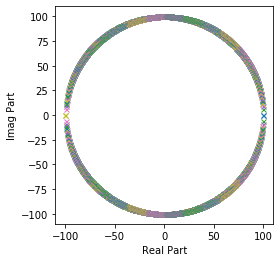

In [11]:
#influence de la variation de m pour T0=1 et w0=100 sur les pôles 
for  m in np.linspace(-1, 1, 1000):
    T = LP(T0=1, m=m, w0=100)
    p, z = T.pzmap(plot=False)
    plot.plot_pzmap(p,z)

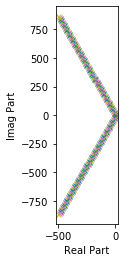

In [12]:
#influence de la variation de w0 pour T0=1 et m=0.5 sur les pôles 
for w0 in np.linspace(10, 1000, 100):
    T = LP(T0=1, m=0.5, w0=w0)
    p, z = T.pzmap(plot=False)
    plot.plot_pzmap(p,z)